In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import math

In [ ]:
x1=h5py.File('../data/mnist.mat','r')
x_imgs=x1.get('digits_train')
x_imgs=np.array(x_imgs,dtype='float32')
x_labels=x1.get('labels_train')
x_labels=np.array(x_labels,dtype='float32')
dig_data=[[],[],[],[],[],[],[],[],[],[]]
for i in range(10):
  dig_data[i]=x_imgs[x_labels[0]==i]
for i in range(10):
  for j in range(dig_data[i].shape[0]):
    dig_data[i]=np.reshape(dig_data[i],(dig_data[i].shape[0],28*28,1))

In [ ]:
#some functions just to help whose functions are clear form names
def trans(arr):
    x,y=np.shape(arr)
    xarr=np.zeros((y,x))
    for i in range(x):
      for j in range(y):
          xarr[j][i]=arr[i][j]
    return xarr
def mean(arr):
  mean=np.zeros((784,1))
  for i in arr:
    mean=mean+i
  return mean/arr.shape[0]
def cov(arr):
  a_mean=mean(arr)
  mat=np.zeros((28*28,28*28))
  for i in arr:
    mat=mat+np.matmul(i-a_mean,trans(i-a_mean))
  return mat/arr.shape[0]
#finding coordinates and eigen vectors 
def find_coords(arr,num):
  ans_arr=np.zeros((784,num))
  W,V=np.linalg.eig(arr)
  indices=(-W).argsort()[:num]
  for i in range(num):
    ans_arr[:,i]=V[indices[i]]
  return ans_arr


In [ ]:
cov_arr=np.zeros((10,784,784))
for i in range(10):
  cov_arr[i]=cov(dig_data[i])

In [ ]:
pri_cmps=np.zeros((10,784,84))
for i in range(10):
  pri_cmps[i]=find_coords(cov_arr[i],84)
def gen(i,arr):#appropiate transposes are used :) for giving proper dimensions
  return trans(np.matmul(trans(arr-mean(dig_data[i])),pri_cmps[i]))
#storing the componets in pri_cmps(answer for part a ends here)
def retransform(i,arr):
  ans=np.zeros((784,1))+mean(dig_data[i])
  for j in range(84):
    ans=ans+arr[j,0]*trans(np.array([pri_cmps[i,:,j]]))
  return np.reshape(ans,(28,28))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


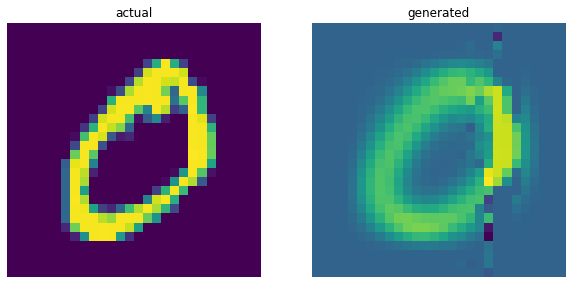

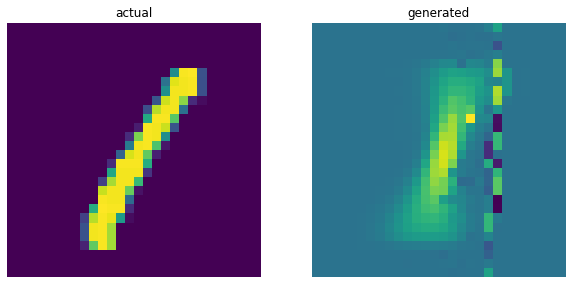

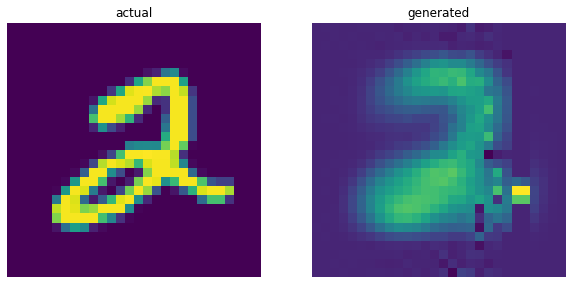

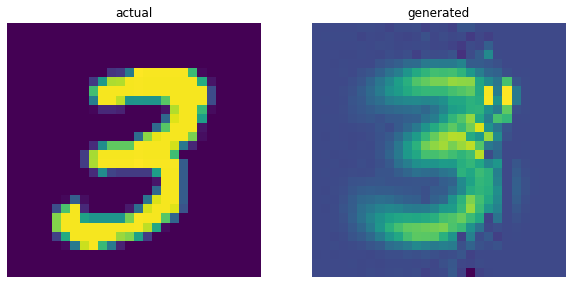

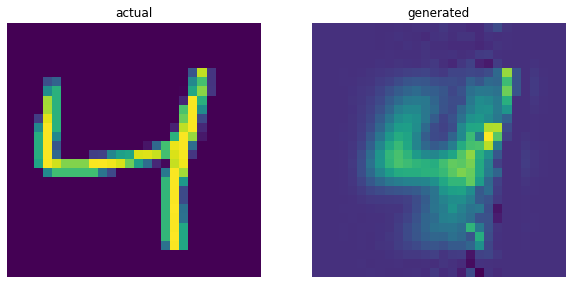

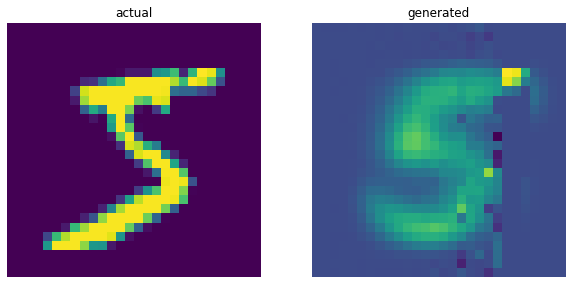

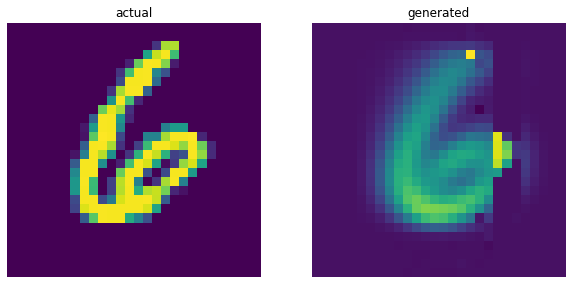

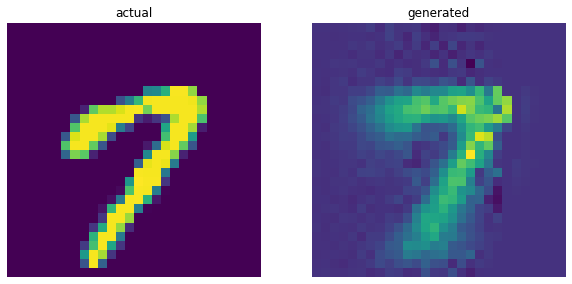

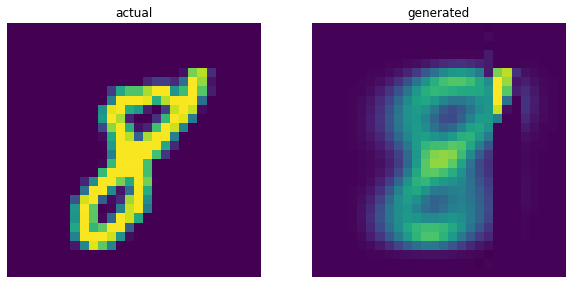

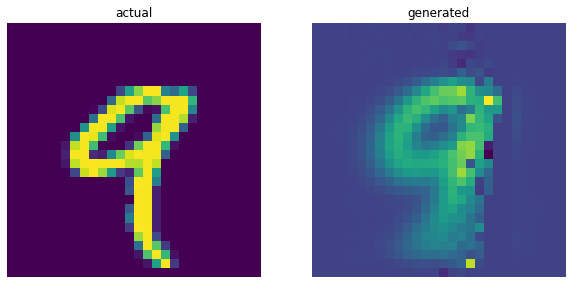

In [ ]:
#beginning of part-2 , most parts are going to be same and there are no ouputs , this seemed the best way
for i in range(10):
  fig=plt.figure(figsize=(10,5))
  fig.add_subplot(1,2,1)
  plt.imshow(trans(np.reshape(dig_data[i][0],(28,28))))
  plt.axis('off')
  plt.title('actual')
  fig.add_subplot(1,2,2)
  plt.imshow(trans(retransform(i,gen(i,dig_data[i][0]))))
  plt.axis('off')
  plt.title('generated')